In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Aplique nas imagens abaixo o algortimo Watershed para realizar a contagem de células. Faça tanto para  a imagem original e para a imagem gradiente

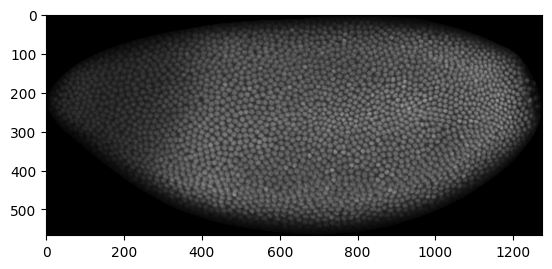

In [2]:
img1 = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

In [4]:
#scaled_image = cv2.resize(img1, ( int(img1.shape[1]/10), int(img1.shape[0]/10) ))
scaled_image = img1[200:500, 700:1000]
scaled_image.shape

(300, 300)

In [3]:

def detect_intersections(coordinates):
    intersection = []
    for i, sublist1 in enumerate(coordinates):
        for j, sublist2 in enumerate(coordinates):
            if i != j:  # Avoid comparing the same sublist
                intersection.extend([coord for coord in sublist1 if coord in sublist2])
    return intersection

def intersectionTwoList(huge_list, small_list):
    huge_set = set(huge_list)
    intersection = [x for x in small_list if x in huge_set]
    return intersection

def remove_elements_from_lists(list_of_lists, elements_to_remove):
    for i, coordinate_list in enumerate(list_of_lists):
        list_of_lists[i] = [coord for coord in coordinate_list if coord not in elements_to_remove]
    return list_of_lists

def generateImageFromList(img, listOfElements):
    temp = [i for i in listOfElements]
    newImg = np.zeros(img.shape)
    for i in temp:
        if i[0]>-1 and i[1]>-1 and i[0] < (img.shape[0]-1) and i[1]<(img.shape[1]-1):
            newImg[i[0], i[1]] = 1
    return newImg

def dilate_coordinates(coordinates, kernel_size=2):
    structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    dilated_coordinates = set()
    for x, y in coordinates:
        dilated = [(x + i, y + j) for i in range(-kernel_size // 2, kernel_size // 2 + 1)
                                    for j in range(-kernel_size // 2, kernel_size // 2 + 1)]
        dilated_coordinates.update(dilated)
    return list(dilated_coordinates)

def get_T(image, n):
    mat = image < n
    mat_height, mat_width = mat.shape
    coordinates = [(i, j) for i in range(mat_height) for j in range(mat_width) if mat[i, j]]
    return coordinates

def generateImg(image, listArcs):
    newImg = np.zeros((image.shape))
    for i in listArcs:
        newImg[i[0], i[1]] = 1
    return np.uint8(newImg)

def find_intersection(list1, list2):
    intersection = [coord for coord in list1 if coord in list2]
    return intersection

def unify_coordinates(list_of_lists):
    return [coord for sublist in list_of_lists for coord in sublist]

def analizeTheLevel(image, listOfAreas, listCoordinatesAtLevel):
    img_Tn = generateImg(image, listCoordinatesAtLevel)
    num_labels, labels = cv2.connectedComponents(img_Tn)
    hist, _ = np.histogram(labels, bins=num_labels)
    single_element_labels = np.where(hist == 1)[0]

    additioned = []

    for ele in single_element_labels:
        positions = np.column_stack(np.where(labels == ele))
        if len(positions) > 0:
            listOfAreas.append([ (positions[0][0], positions[0][1]) ])
            additioned.append((positions[0][0], positions[0][1]) )
    return additioned


In [83]:

image = 255-scaled_image
img_min = np.min(image)
img_max = np.max(image)
listSmallAreas = []


n = img_min +1
listCoordinatesLevel = get_T(image, n)

aux = [i for i in listCoordinatesLevel]

img_Tn = generateImg(image, aux)
num_labels, labels = cv2.connectedComponents(img_Tn)

hist, _ = np.histogram(labels, bins=num_labels)
single_element_labels = np.where(hist == 1)[0]

for ele in single_element_labels:
    positions = np.column_stack(np.where(labels == ele))
    if len(positions) > 0:
        listSmallAreas.append([ (positions[0][0], positions[0][1]) ])

# dilate elements
for i in range(0, len(listSmallAreas)):
    listSmallAreas[i] = dilate_coordinates(listSmallAreas[i])

#identify intersetions
intersections = []
for i in range(2,60):
    listCoordinatesAtLevel = get_T(image, n+i)
    listUnifiedCoordinates = unify_coordinates(listSmallAreas)

    additionedCoordinate = analizeTheLevel(image, listSmallAreas, listCoordinatesAtLevel)
    #intersection = intersectionTwoList(listCoordinatesLevel, listUnifiedCoordinates)
    for index in range(0, len(listSmallAreas)):
        listSmallAreas[index] = intersectionTwoList(listCoordinatesAtLevel, listSmallAreas[index] )

    for j in range(0, len(listSmallAreas)):
        listSmallAreas[j] = dilate_coordinates(listSmallAreas[j])
    
    remove_elements_from_lists(listSmallAreas, intersections)

    newIntersections = detect_intersections(listSmallAreas)
    if len(newIntersections)>0:
        #print("intersecciones" + str(len(newIntersections) ) )
        remove_elements_from_lists(listSmallAreas, newIntersections)
        for i in newIntersections:
            intersections.append(newIntersections)


intersecciones54
intersecciones44
intersecciones62
intersecciones26
intersecciones44
intersecciones26
intersecciones152
intersecciones80
intersecciones190
intersecciones182
intersecciones238
intersecciones186
intersecciones282
intersecciones270
intersecciones278
intersecciones320
intersecciones512
intersecciones474
intersecciones598
intersecciones476
intersecciones604
intersecciones776
intersecciones728
intersecciones890
intersecciones900
intersecciones1024
intersecciones1238
intersecciones1398
intersecciones1548
intersecciones1720
intersecciones1800
intersecciones2178
intersecciones2246
intersecciones2442
intersecciones2550
intersecciones3108
intersecciones2904
intersecciones3426
intersecciones3390
intersecciones3644
intersecciones3794
intersecciones4068
intersecciones4454
intersecciones4622
intersecciones5102
intersecciones5166


KeyboardInterrupt: 

In [5]:
class SmallPiece:
    IS_GROWING = True
    listCoordinates = {}
    listOfNewCoordinates = {}

    def __init__(self, coordinate, kernel_size=2):
        self.listCoordinates = {coordinate}  # Use a set for coordinates
        self.listOfNewCoordinates = set()
        self.kernel_size = kernel_size
        self.structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    
    def dilate_small_piece(self):
        cord_for_dil = set()

        if self.listOfNewCoordinates:
            cord_for_dil = self.listOfNewCoordinates.copy()
            self.listCoordinates.update(self.listOfNewCoordinates)  # Use update to add elements to set
        elif len(list(self.listCoordinates)) == 1:
            cord_for_dil = self.listCoordinates.copy()
        else:
            self.IS_GROWING = False

        if self.IS_GROWING:
            new_coords_to_dilate = set()
            for coord in cord_for_dil.copy():
                x, y = coord
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        new_coord = (x + dx, y + dy)
                        new_coords_to_dilate.add(new_coord)
            self.listOfNewCoordinates = new_coords_to_dilate - self.listCoordinates
        

    def remove_elements(self, elements_to_remove):
        self.listOfNewCoordinates -= elements_to_remove
    
    def set_listOfNewCoordinates(self, new_coords):
        self.listOfNewCoordinates = set(new_coords)

    def get_listOfNewCoordinates(self):
        return list(self.listOfNewCoordinates)

    def wholeElements(self):
        coordinates = self.listCoordinates.copy()
        coordinates.update(self.listOfNewCoordinates)
        return list(coordinates)
    
    def wholeCoordenates(self):
        coordinates = self.listCoordinates.copy()
        coordinates.update(self.listOfNewCoordinates)
        return coordinates
    

In [343]:
list_small_areas = []
newtemp1 = SmallPiece( (5,5) )
newtemp1.dilate_small_piece()

list_small_areas.append(newtemp1)

newtemp2 = SmallPiece( (9,9) )
newtemp2.dilate_small_piece()

list_small_areas.append(newtemp2)


In [355]:
for j in range(0, len(list_small_areas)):
    piece = list_small_areas[j]
    piece.dilate_small_piece()

In [342]:
def identify_common_elements(list_small_areas):
    all_coordinates = [set(small_piece.wholeElements()) for small_piece in list_small_areas]
    common_elements = set.intersection(*all_coordinates)
    for i in list_small_areas:
        i.remove_elements(common_elements)
    return common_elements

In [356]:
identify_common_elements(list_small_areas)

{(5, 8), (5, 9), (6, 8), (6, 9), (8, 5), (8, 6), (9, 5), (9, 6)}

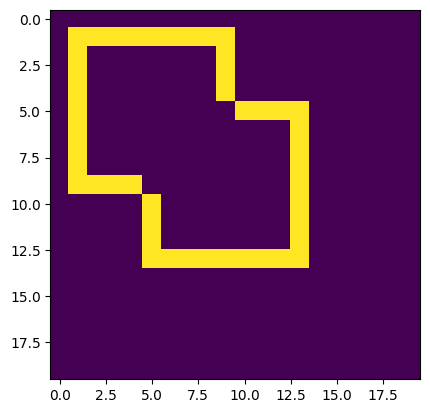

In [357]:
unionOfSmallPieces = [element for piece in list_small_areas for element in piece.get_listOfNewCoordinates()] 
temp = generateImageFromList( np.zeros((20,20)), unionOfSmallPieces )
plt.imshow(temp)

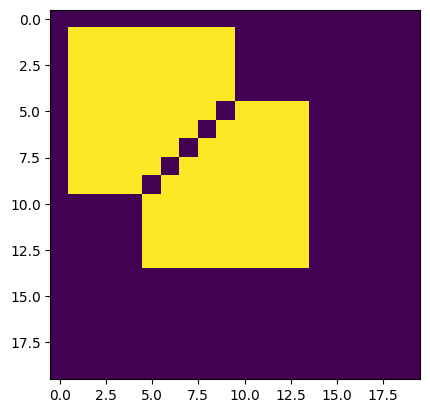

In [358]:
unionOfSmallPieces = [element for piece in list_small_areas for element in piece.wholeElements()] 
temp = generateImageFromList( np.zeros((20,20)), unionOfSmallPieces )
plt.imshow(temp)

In [6]:
image = 255 - scaled_image
image = cv2.medianBlur(image, 3)
img_min = np.min(image)
img_max = np.max(image)
list_small_areas = []
intersections = []
list_coordinates_at_level = []

def evaluate_coord_by_neighborhood(coordinates):
    coords_set = set(coordinates)
    result = []
    
    def has_neighbors(coord):
        x, y = coord
        for i in range(-1, 2):
            for j in range(-1, 2):
                if (i, j) != (0, 0):
                    neighbor = (x + i, y + j)
                    if neighbor in coords_set:
                        return True
        return False
    
    for coord in coordinates:
        if not has_neighbors(coord):
            result.append(coord)
    
    return result

def find_intersection(list1, list2):
    return list(set(list1) & set(list2))

def remove_elements_from_lists(list_of_lists, elements_to_remove):
    return [[coord for coord in sublist if coord not in elements_to_remove] for sublist in list_of_lists]

def connected_components(coordinates):
    visited = set()
    components = []

    def dfs(coord, component):
        if coord in visited:
            return
        visited.add(coord)
        component.append(coord)

        neighbors = [(coord[0] + dx, coord[1] + dy) for dx in (-1, 0, 1) for dy in (-1, 0, 1)]
        for neighbor in neighbors:
            if neighbor in coordinates and neighbor not in visited:
                dfs(neighbor, component)

    for coord in coordinates:
        if coord not in visited:
            new_component = []
            dfs(coord, new_component)
            components.append(new_component)

    return components

def analyze_level(image, list_coordinates_at_level, list_small_areas):
    listNewCoordinates = evaluate_coord_by_neighborhood(list_coordinates_at_level)
    additioned = []
    for coord in listNewCoordinates:
        piece = SmallPiece(coord)
        list_small_areas.append(piece)
        additioned.append(coord)
    return additioned

def analyze_level_by_conected_components(image, list_coordinates_at_level, list_small_areas):
    connected_comps = connected_components(list_coordinates_at_level)
    additioned = []
    for component in connected_comps:
        if len(component) == 1:  # Consider single-element components
            coord = component[0]
            piece = SmallPiece(coord)
            list_small_areas.append(piece)
            additioned.append(coord)
    return additioned

def identify_and_remove_common_elements(list_small_areas):
    removed_elements = set()
    for i in range(len(list_small_areas)):
        for j in range(i + 1, len(list_small_areas)):
            common_elements = list_small_areas[i].wholeCoordenates().intersection(list_small_areas[j].wholeCoordenates())
            removed_elements.update(common_elements)
            list_small_areas[i].remove_elements(common_elements)
            list_small_areas[j].remove_elements(common_elements)
    return removed_elements

for i in range(img_min+1, img_max+2):
    list_coordinates_at_level = get_T(image, img_min + i)
    additioned_coordinate = analyze_level(image, list_coordinates_at_level, list_small_areas)

#for i in range(img_min+1, img_max+2):
#    for j in range(0, len(list_small_areas)):
#        piece = list_small_areas[j]
#        piece.dilate_small_piece()

#    intersectionToRemove = identify_and_remove_common_elements(list_small_areas)
#    print("intersection"+str(len(intersectionToRemove)) )
#    for piece in list_small_areas:
#        intersection = find_intersection(list_coordinates_at_level, piece.get_listOfNewCoordinates() )
#        piece.set_listOfNewCoordinates(intersection)
#    print("iteration "+str(i) )


In [411]:
set.intersection(*[{(6, 102), (8, 104), (6, 104), (7, 103), (8, 103), (6, 103), (7, 102), (8, 102), (7, 104)},
                  {(6, 102), (8, 104), (6, 100), (7, 13), (8, 31), (6, 183), (7, 132), (8, 122), (7, 204)},(7, 132), (8, 122), (7, 204)])

set()

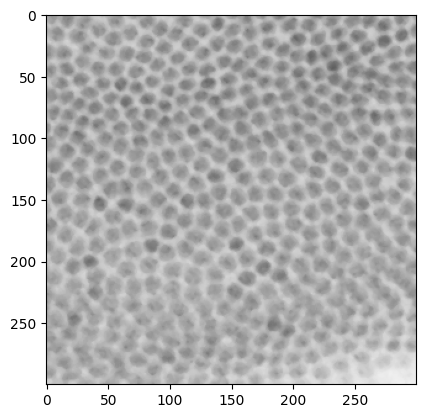

In [474]:
image = 255 - scaled_image
image = cv2.medianBlur(image, 3)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

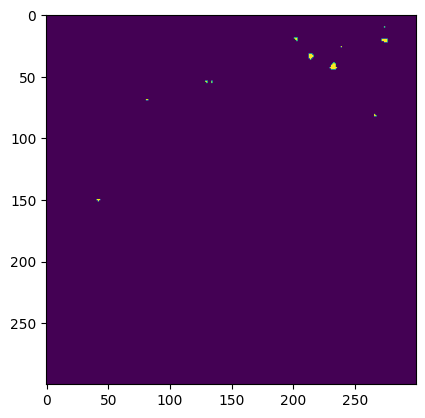

In [483]:
list_coordinates_at_level = get_T(image, img_min + 15)
temp = generateImageFromList(image, list_coordinates_at_level)
plt.imshow(temp)

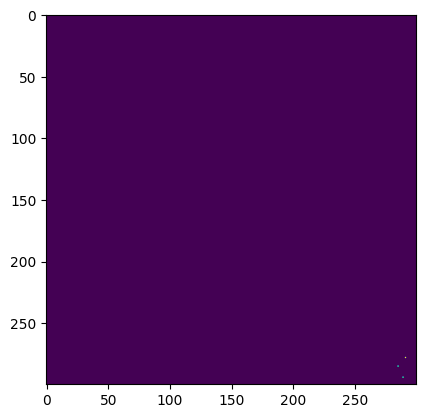

In [476]:
unionOfSmallPieces = [element for piece in list_small_areas for element in piece.wholeElements()] 
temp = generateImageFromList( image, unionOfSmallPieces )
plt.imshow(temp)

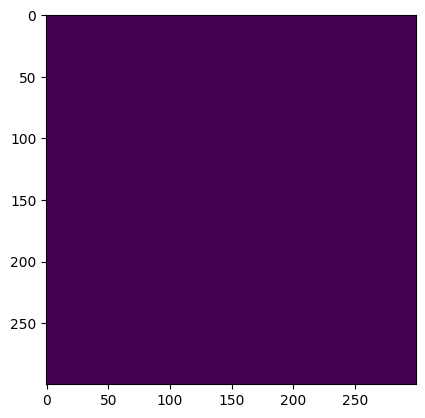

In [467]:
unionOfSmallPieces = [element for piece in list_small_areas for element in piece.get_listOfNewCoordinates()] 
temp = generateImageFromList( image, unionOfSmallPieces )
plt.imshow(temp)

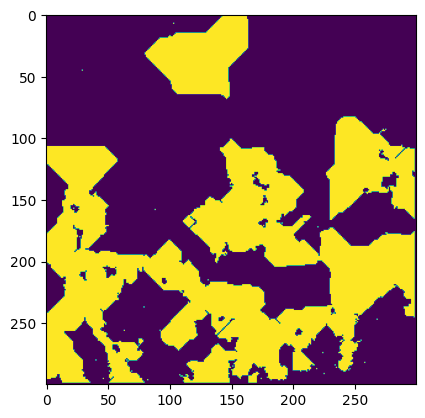

In [452]:
unionOfSmallPieces = [element for piece in list_small_areas[0:120] for element in piece.wholeElements()] 
temp = generateImageFromList( image, unionOfSmallPieces )
plt.imshow(temp)

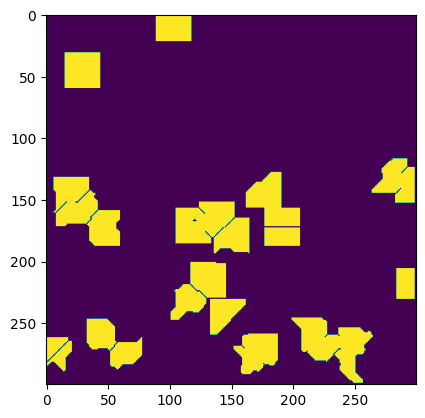

In [436]:
unionOfSmallPieces = [element for piece in list_small_areas[0:28] for element in piece.wholeElements()] 
temp = generateImageFromList( image, unionOfSmallPieces )
plt.imshow(temp)

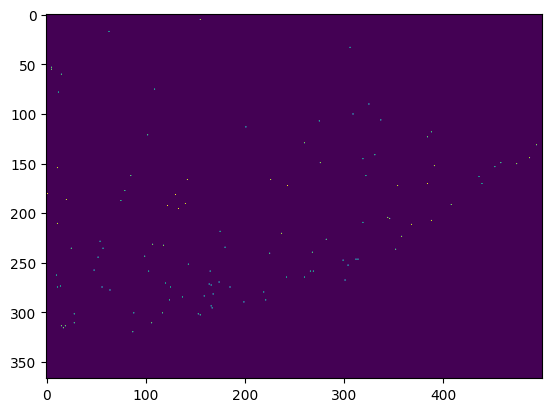

In [18]:
temp = generateImageFromList( image, temp )
plt.imshow(temp)

In [17]:
temp = evaluate_coord_by_neighborhood(list_coordinates_at_level)

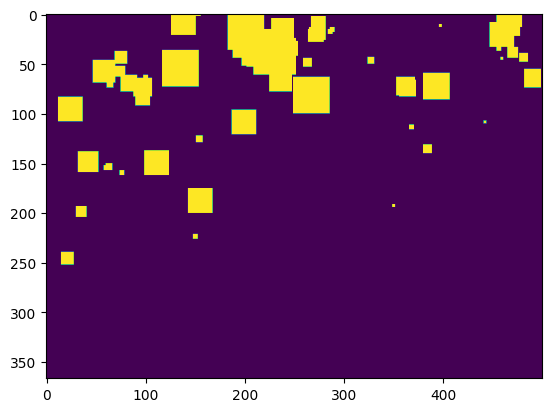

In [23]:
temp = generateImageFromList( image, [element for sublist in list_small_areas for element in sublist.wholeElements()] )
plt.imshow(temp)

In [161]:
listCoordinatesLevel = get_T(image, n+50)

In [74]:
intersection = intersectionTwoList(listCoordinatesLevel, listWholeCoordinates)

In [34]:
temp = generateImageFromList(image, unify_coordinates(list_small_areas))

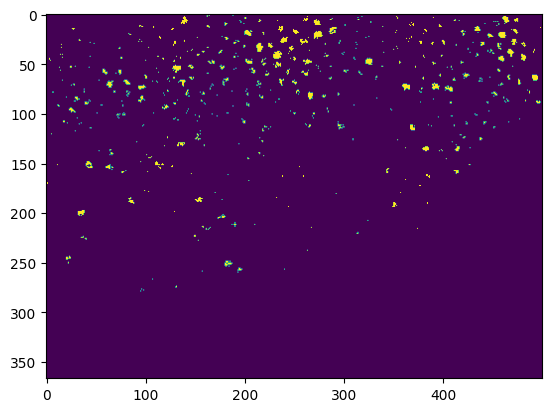

In [35]:
plt.imshow(temp)

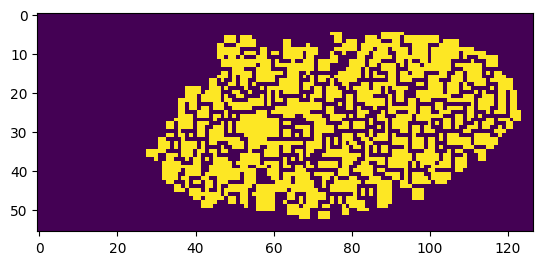

In [79]:
plt.imshow(temp)

In [82]:
dilate_coordinates([(5,5), (6,6)])

[(4, 4),
 (5, 5),
 (7, 7),
 (6, 5),
 (5, 4),
 (4, 6),
 (6, 4),
 (5, 7),
 (6, 7),
 (4, 5),
 (7, 6),
 (5, 6),
 (6, 6),
 (7, 5)]

In [78]:
intersectionTwoList(listCoordinatesLevel, listAreas)

[(243, 933), (255, 835), (282, 967)]

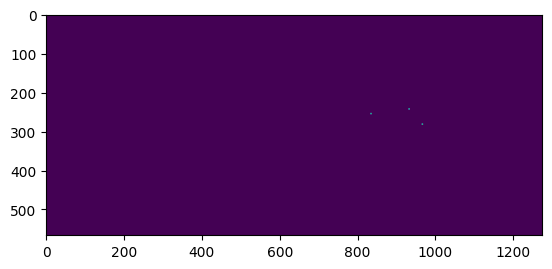

In [81]:
temp = generateImageFromList(image, newList)
plt.imshow(temp)

In [95]:
class Watershed:
    def __init__(self, image):
        self.image = image
        self.height, self.width = image.shape
        self.labels = np.zeros_like(image)  # To store labels

        self.listMi = []
    
    def generateImg(self, listArcs):
        newImg = np.zeros((self.image.shape))
        for i in listArcs:
            newImg[i[0], i[1]] = 1
        return np.uint8(newImg)
    
    def generateListFromImg(self, img):
        rows, cols = np.nonzero(img)  # Get non-zero pixel indices
        newList = list(zip(rows, cols))  # Combine row and column indices
        return newList

    def get_g(self, s, t):
        return self.image[s,t]
    
    def getMin(self):
        return np.min(self.image)
    
    def getMax(self):
        return np.max(self.image)

    def get_T(self, n):
        mat = self.image < n
        mat_height, mat_width = mat.shape
        coordinates = [(i, j) for i in range(mat_height) for j in range(mat_width) if mat[i, j]]
        return coordinates

    def apply_watershed(self):
        # Implement your watershed algorithm here
        # You can use the image stored in self.image and implement the watershed algorithm steps

        # Example: Marking regions with unique labels
        unique_labels = 1
        for i in range(self.height):
            for j in range(self.width):
                # For demonstration purposes, applying a simple labeling scheme
                if self.image[i, j] > 0:  # Modify this condition based on your watershed criteria
                    self.labels[i, j] = unique_labels
                    unique_labels += 1

    def get_segmented_image(self):
        # Return the segmented image based on the labels obtained from watershed
        segmented_image = np.zeros_like(self.image)
        for i in range(1, np.max(self.labels) + 1):
            segmented_image[self.labels == i] = i * 10  # Assigning unique intensity for each segment
        return segmented_image
    
    def calculate_watersheds(image, min_val, max_val):
        watersheds = []  # Initialize a list to store watersheds for each minimum
        # Assuming image is a 2D array representing the grayscale image
        for min_value in range(min_val, max_val + 1):
            # Calculate the watershed for each minimum value
            watershed_min = []
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    # Check if the pixel value is associated with the current minimum value
                    if image[i, j] == min_value:
                        watershed_min.append((i, j, image[i, j]))  # Storing coordinates and value g(s, t)
            # Store the watershed for the current minimum value
            watersheds.append(watershed_min)

        return watersheds

    def calculate_C_n(watersheds, n):
        # Assuming 'watersheds' is a list containing C_n(M_i) for each minimum M_i
        # Each C_n(M_i) is a set of coordinates of points in the watershed associated with minimum M_i
        C_n_union = set()  # Initialize the union of flooded watersheds at step 'n'

        for watershed in watersheds:
            if watershed:  # Check if the watershed is not empty
                for coord in watershed:
                    if coord[2] < n:  # Assuming coord[2] represents the value g(s, t) at coordinates (s, t)
                        C_n_union.add((coord[0], coord[1]))  # Add coordinates to the union set

        return list(C_n_union) 

    def getTheNewElements(self, n):
        listTemp = self.get_T(n)
        img_Tn = self.generateImg(listTemp)
        # Calculate connected components
        num_labels, labels = cv2.connectedComponents(img_Tn)
        # Count elements per component
        hist, _ = np.histogram(labels, bins=num_labels)
        # Find single-element labels directly
        single_element_labels = np.where(hist == 1)[0]

        for ele in single_element_labels:
            # Find positions of single-element label directly
            positions = np.column_stack(np.where(labels == ele))
            if len(positions) > 0:
                self.listMi.append((positions[0][0], positions[0][1]))
    
    def getConnectedComponents(self, listCoordinates):
        img_Tn = self.generateImg(listCoordinates)
        num_labels, labels = cv2.connectedComponents(img_Tn)
        return num_labels, labels
    
    def dilationState(self, imgConectedComponents):
        kernel = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype=np.uint8)
        #temp = self.generateImg(listCorrdenates)
        tempDil = cv2.dilate(imgConectedComponents, kernel, iterations=1)
        #tempImg = cv2.erode(binary_image, kernel, iterations=3)
        return tempDil
    
    def get_C_Mi(self, connectedComponents, i):
        coordinates = self.listMi[i]
        m_i_label = connectedComponents[coordinates[0], coordinates[1]]
        naighborhood = np.column_stack(np.where(connectedComponents == m_i_label))
        print(naighborhood)
# Example usage:
#Assuming 'input_image' is your grayscale input image



In [102]:
watershed = Watershed(255-img1)
listTemp = watershed.get_T(120)
watershed.getTheNewElements(120)
labels, connectedComponents  = watershed.getConnectedComponents(listTemp)
#segmented_output = watershed.get_segmented_image()

In [103]:
watershed.listMi

[(75, 745),
 (97, 932),
 (98, 1069),
 (99, 1071),
 (116, 910),
 (119, 1030),
 (124, 1117),
 (128, 1030),
 (134, 1139),
 (137, 548),
 (136, 668),
 (137, 912),
 (136, 1092),
 (138, 1044),
 (138, 1080),
 (140, 1140),
 (144, 1072),
 (146, 738),
 (152, 1047),
 (152, 1107),
 (158, 1123),
 (158, 1147),
 (163, 891),
 (165, 893),
 (166, 1107),
 (177, 1105),
 (178, 1191),
 (180, 832),
 (180, 1140),
 (180, 1175),
 (182, 888),
 (183, 1140),
 (185, 1075),
 (184, 1130),
 (185, 1139),
 (188, 526),
 (188, 1078),
 (189, 1092),
 (191, 1143),
 (193, 1112),
 (193, 1144),
 (194, 950),
 (195, 1167),
 (195, 1191),
 (198, 851),
 (199, 892),
 (201, 1137),
 (203, 963),
 (207, 933),
 (207, 959),
 (206, 1015),
 (207, 1112),
 (208, 1027),
 (211, 1066),
 (210, 1156),
 (212, 1001),
 (216, 827),
 (217, 906),
 (219, 919),
 (221, 785),
 (221, 1120),
 (223, 877),
 (223, 1025),
 (224, 815),
 (225, 973),
 (225, 1063),
 (227, 839),
 (226, 1204),
 (228, 893),
 (228, 1169),
 (230, 958),
 (230, 981),
 (230, 1158),
 (230, 1180

In [51]:
watershed = Watershed(255-img1)
watershed.getConnectedComponents(watershed.getMin()+40)
tempConComp = watershed.generateImg(watershed.listMi)

temp = watershed.dilationState(tempConComp)
temp = watershed.dilationState(temp)
temp = watershed.dilationState(temp)

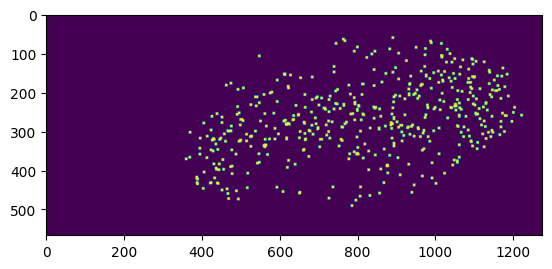

In [52]:
plt.imshow(temp)

In [36]:
num_labels, labels = cv2.connectedComponents(temp)
hist, bins = np.histogram(labels, bins=num_labels)
single_element_labels = np.where(hist == 1)
positions = np.argwhere(labels == 1)
positions

array([[ 75, 745]], dtype=int64)

In [54]:
def neighbourhood(image, x, y):
    # Save the neighbourhood pixel's values in a dictionary
    neighbour_region_numbers = {}
    for i in range(-1, 2):
        for j in range(-1, 2):
            if (i == 0 and j == 0):
                continue
            if (x+i < 0 or y+j < 0): # If coordinates out of image range, skip
                continue
            if (x+i >= image.shape[0] or y+j >= image.shape[1]): # If coordinates out of image range, skip
                continue
            if (neighbour_region_numbers.get(image[x+i][y+j]) == None):
                neighbour_region_numbers[image[x+i][y+j]] = 1 # Create entry in dictionary if not already present
            else:
                neighbour_region_numbers[image[x+i][y+j]] += 1 # Increase count in dictionary if already present

    # Remove the key - 0 if exists
    if (neighbour_region_numbers.get(0) != None):
        del neighbour_region_numbers[0]

    # Get the keys of the dictionary
    keys = list(neighbour_region_numbers)

    # Sort the keys for ease of checking
    keys.sort()

    if (keys[0] == -1):
        if (len(keys) == 1): # Separate region
            return -1
        elif (len(keys) == 2): # Part of another region
            return keys[1]
        else: # Watershed
            return 0
    else:
        if (len(keys) == 1): # Part of another region
            return keys[0]
        else: # Watershed
            return 0

def watershed_segmentation(image):
    # Create a list of pixel intensities along with their coordinates
    intensity_list = []
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            # Append the tuple (pixel_intensity, xy-coord) to the end of the list
            intensity_list.append((image[x][y], (x, y)))

    # Sort the list with respect to their pixel intensities, in ascending order
    intensity_list.sort()

    # Create an empty segmented_image numpy ndarray initialized to -1's
    segmented_image = np.full(image.shape, -1, dtype=int)

    # Iterate the intensity_list in ascending order and update the segmented image
    region_number = 0
    for i in range(len(intensity_list)):
        # Get the pixel intensity and the x,y coordinates
        intensity = intensity_list[i][0]
        x = intensity_list[i][1][0]
        y = intensity_list[i][1][1]

        # Get the region number of the current pixel's region by checking its neighbouring pixels
        region_status = neighbourhood(segmented_image, x, y)

        # Assign region number (or) watershed accordingly, at pixel (x, y) of the segmented image
        if (region_status == -1): # Separate region
            region_number += 1
            segmented_image[x][y] = region_number
        elif (region_status == 0): # Watershed
            segmented_image[x][y] = 0
        else: # Part of another region
            segmented_image[x][y] = region_status

    # Return the segmented image
    return segmented_image



segmented_image = watershed_segmentation(img1)

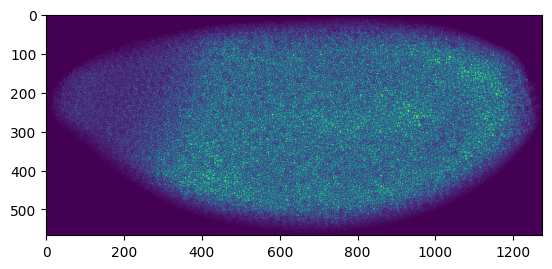

In [59]:
plt.imshow(segmented_image)

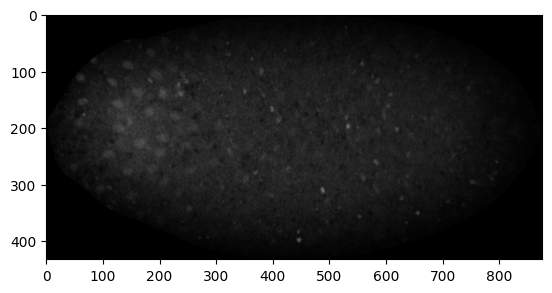

In [60]:
img2 = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

In [61]:
segmented_image = watershed_segmentation(img2)

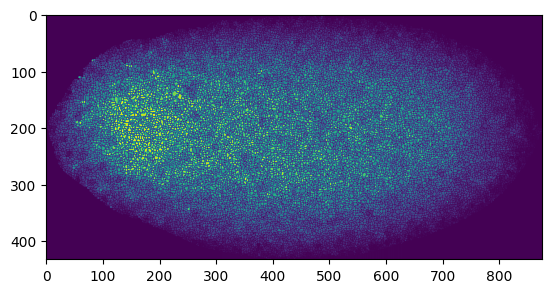

In [62]:
plt.imshow(segmented_image)

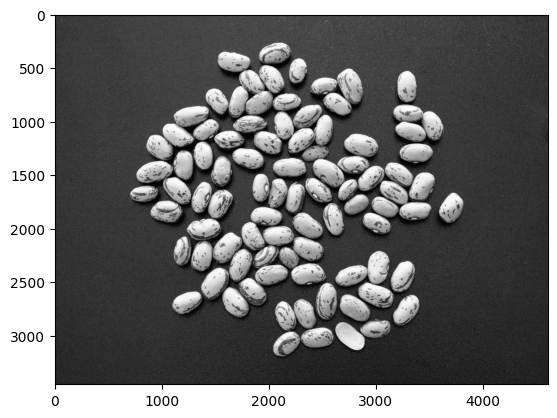

In [63]:
img3 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img3, cmap='gray', vmin=0, vmax=255);

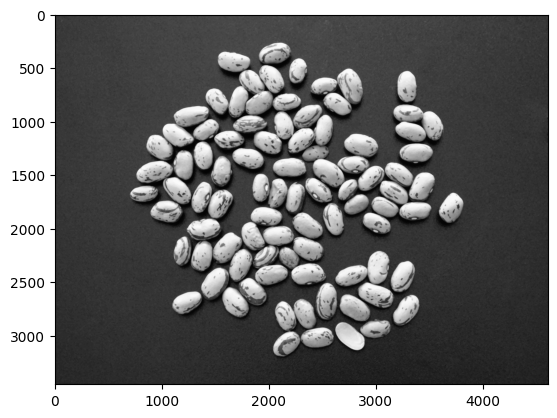

In [83]:
result = cv2.medianBlur(img3, 11)
plt.imshow(result, cmap='gray', vmin=0, vmax=255)

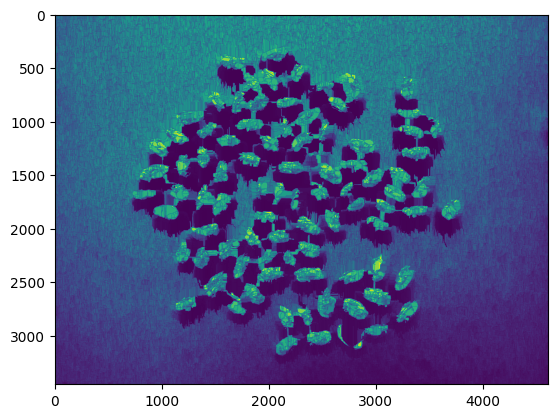

In [67]:
segmented_image = watershed_segmentation(result)
plt.imshow(segmented_image)

In [84]:
scaled_image = cv2.resize(result, ( int(result.shape[1]/10), int(result.shape[0]/10) ))

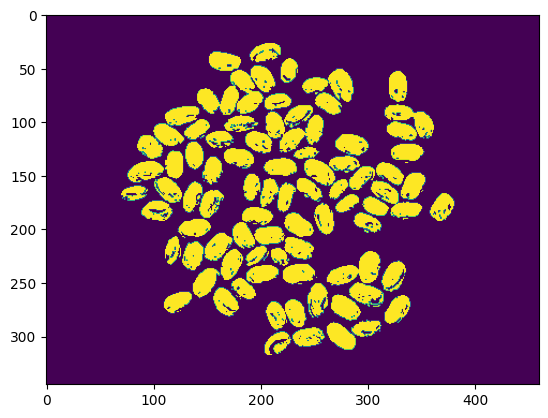

In [85]:
_, binary_image = cv2.threshold( scaled_image , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary_image)

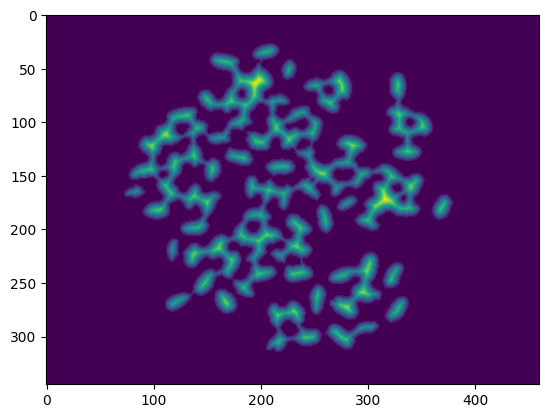

In [86]:
dist_transform = cv2.distanceTransform( temp, cv2.DIST_L2, cv2.DIST_MASK_5)
plt.imshow(dist_transform)

In [91]:
np.max(255-dist_transform)

255.0

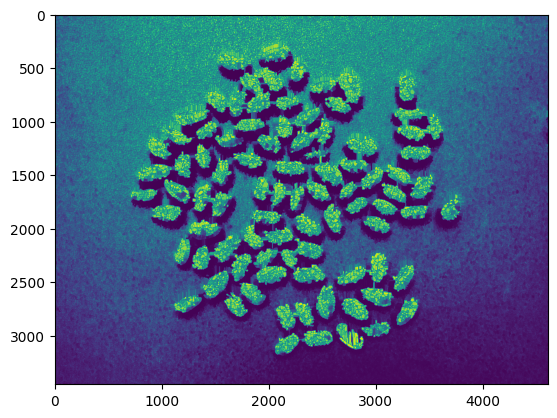

In [94]:
segmented_image = watershed_segmentation(result)
plt.imshow(segmented_image)
